In [154]:
%matplotlib inline
import pandas as pd
idx = pd.IndexSlice
import numpy as np
import csv

In [155]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [156]:
acq = pd.read_csv('C:\\Users\\Gabe\\Documents\\Springboard\\Projects\\Mini Data Project\\XML_data_acquisitions.csv')
acq.head(100)

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,...,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/organization/magnify,Waywire,...,USA,NY,New York City,New York,2013-10-17 0:00,13-Oct,2013-Q4,2013,NaN,USD
1,/organization/fluff-friends,(fluff)Friends,NaN,NaN,NaN,NaN,NaN,NaN,/organization/social-gaming-network,SGN (Social Gaming Network),...,USA,CA,Los Angeles,Beverly Hills,2008-09-16 0:00,08-Sep,2008-Q3,2008,NaN,USD
2,/organization/red,(RED),|Nonprofits|,Nonprofits,USA,NY,New York City,New York,/organization/nationstar-mortgage-holdings,Nationstar Mortgage Holdings,...,USA,TX,Dallas,Lewisville,2014-05-08 0:00,14-May,2014-Q2,2014,"18,000,000",USD
3,/organization/co-internet,.CO,|Registrars|Domains|Curated Web|,Registrars,USA,FL,Miami,Miami,/organization/neustar,Neustar,...,USA,VA,Sterling,Sterling,2014-03-20 0:00,14-Mar,2014-Q1,2014,"109,000,000",USD
4,/organization/vantronix,.vantronix,|Cloud Security|Network Security|Security|,Cloud Security,DEU,NaN,Hanover,Hanover,/organization/compumatica,Compumatica,...,NaN,NaN,NaN,NaN,2011-01-01 0:00,11-Jan,2011-Q1,2011,NaN,USD
5,/organization/003-ru,003.RU,NaN,NaN,RUS,NaN,Moscow,Moscow,/organization/media-saturn,Media Saturn,...,ESP,NaN,Barcelona,Barcelona,2012-07-23 0:00,12-Jul,2012-Q3,2012,NaN,USD
6,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,...,USA,WA,Seattle,Seattle,2012-02-02 0:00,12-Feb,2012-Q1,2012,"9,000,000",USD
7,/organization/1-nation-technology,1 Nation Technology,NaN,NaN,NaN,NaN,NaN,NaN,/organization/vology,Vology,...,NaN,NaN,NaN,NaN,2006-01-01 0:00,06-Jan,2006-Q1,2006,NaN,USD
8,/organization/1-800-contacts,1-800 Contacts,NaN,NaN,NaN,NaN,NaN,NaN,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,...,USA,MA,Boston,Boston,2014-01-07 0:00,14-Jan,2014-Q1,2014,NaN,USD
9,/organization/1000-markets,1000 Markets,|Marketplaces|Art|E-Commerce|,Marketplaces,NaN,NaN,NaN,NaN,/organization/bonanzle,Bonanza,...,USA,WA,Seattle,Seattle,2012-09-22 0:00,12-Sep,2012-Q3,2012,NaN,USD


### What was the biggest year for acquisitions?

In [157]:
acq.acquired_year.value_counts().head(5).sort_index()

2010    1553
2011    1751
2012    1520
2013    1701
2014    1686
Name: acquired_year, dtype: int64

Evidently, 2011 is the more exciting year for M&As

### What were some of the most exciting months of the year for M&A, and can you plot it?

In [158]:
months = acq[acq.acquired_year == 2011]
months = months.acquired_month.value_counts().head(12)
months = months.reindex(["11-Jan", "11-Feb", "11-Mar", "11-Apr", "11-May", "11-Jun", "11-Jul", "11-Aug", "11-Sep", "11-Oct", "11-Nov", "11-Dec"])
months

11-Jan    217
11-Feb    126
11-Mar    137
11-Apr    136
11-May    141
11-Jun    168
11-Jul    178
11-Aug    149
11-Sep    133
11-Oct    113
11-Nov    114
11-Dec    139
Name: acquired_month, dtype: int64

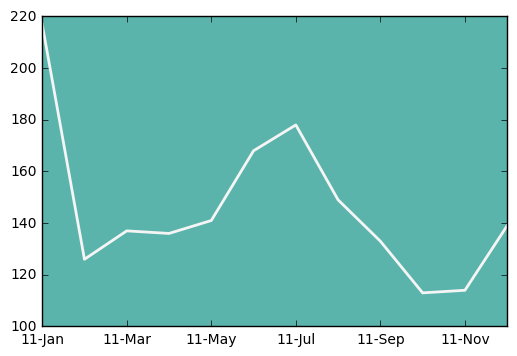

In [159]:
import matplotlib.pyplot as plt
months.plot(linewidth=2, color='#f5f5f5', drawstyle='default').set_axis_bgcolor('#5ab4ac')

### What companies were some of the more aggressive, in terms of acqusitions for that year?

In [160]:
acq = acq[acq.acquired_year == 2011]
list_acq = acq[acq.acquired_year == 2011]
list_acq = acq.acquirer_name.value_counts()
list_acq = list_acq.head(15)

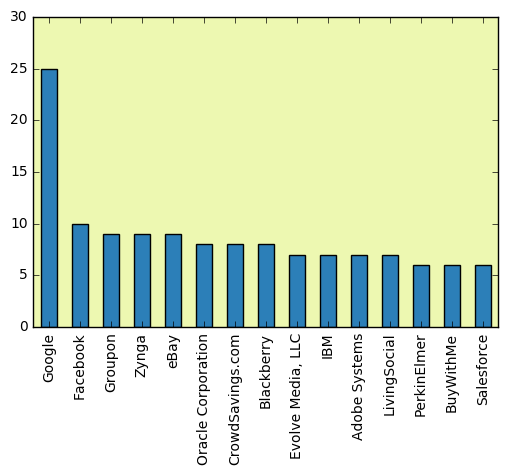

In [161]:
list_acq.plot(kind="bar", ylim=[0,30], color='#2c7fb8').set_axis_bgcolor('#edf8b1')

## What were some of the acquisition prices that companies paid?

In [176]:
acq = acq[acq.acquired_year == 2011]
spending = acq[acq.price_amount.notnull()]
spending = spending[spending.notnull()][['company_name', 'price_amount']]
spending.head(15)

,company_name,price_amount
52,360Naija Forum,"10,000"
84,56.com,"80,000,000"
89,5to1,"30,000,000"
163,AcceloWeb,"20,000,000"
286,Adenyo,"100,000,000"
296,AdGrok,"10,000,000"
315,Admeld,"400,000,000"
327,Adolor,"453,000,000"
335,Adperio,"30,000,000"
351,Advanced Analogic Technologies,"262,500,000"


### Number of companies that are based in the U.S. vs Non-U.S.

In [163]:
#US company names
USA_com = acq[acq.company_country_code == 'USA'][['company_name']]
len(USA_com)

942

In [164]:
# Non-US company names
NONUSA_com = acq[acq.company_country_code != 'USA'][['company_name']]
len(NONUSA_com)

809

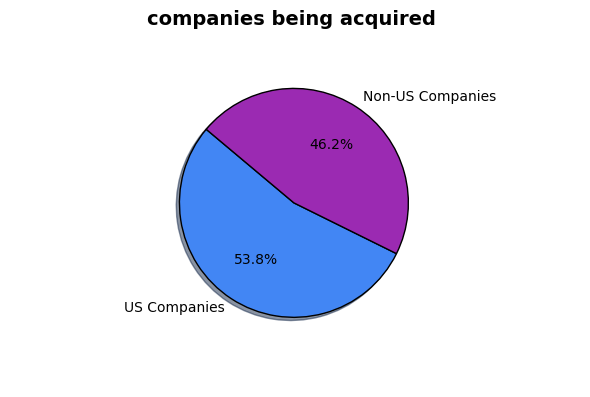

In [165]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle('companies being acquired ', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.60)

values = [942, 809]
labels = ['US Companies',
          'Non-US Companies'
         ]
colors = ['#4286f4','#9b2ab2']

ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.axis('equal')
fig.tight_layout()
plt.draw()

In [166]:
#US acquirer names
USA_acq = acq[acq.acquirer_country_code == 'USA'][['acquirer_name']]
len(USA_acq)

1304

In [167]:
# Non-US acquirer names
NONUSA_acq = acq[acq.acquirer_country_code != 'USA'][['acquirer_name']]
len(NONUSA_acq)

447

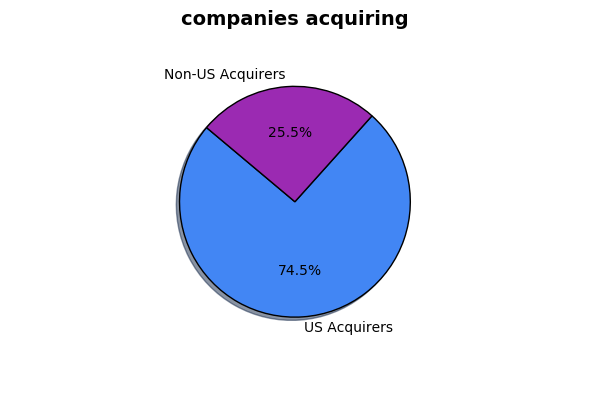

In [168]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle('companies acquiring', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.60)

values = [1304, 447]
labels = ['US Acquirers',
          'Non-US Acquirers'
         ]
colors = ['#4286f4','#9b2ab2']

ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.axis('equal')
fig.tight_layout()
plt.draw()

### List of top 15 US States that have had the most acquisitions in 2011

In [169]:
USA_state = acq[acq.company_country_code == 'USA'][['company_state_code', 'company_name']]
USA_state = USA_state.sort_values(by='company_state_code').set_index('company_name')
USA_state = USA_state.unstack('company_state_code').value_counts()
top_state = USA_state.head(15)

In [170]:
sum(USA_state)

942

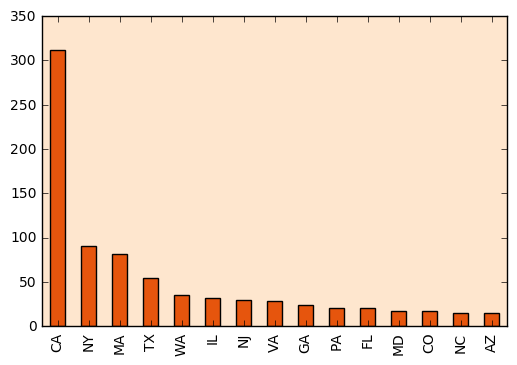

In [171]:
top_state.plot(kind='bar', color='#e6550d').set_axis_bgcolor('#fee6ce')